In [1]:
import tensorflow as tf
import numpy as np

tf.__version__

'2.15.0'

In [2]:
a = tf.constant(10)
b = tf.constant(20)

c = a + b
d = (a + b).numpy()

print(type(c))
print(c)
print(type(d))
print(d)

d_numpy_to_tensor = tf.convert_to_tensor(d)
print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)
<class 'numpy.int32'>
30
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

In [4]:
x_data = np.array([1, 2, 3, 4, 5, 6])
t_data = np.array([3, 4, 5, 6, 7, 8])

In [18]:
model = Sequential()
model.add(Flatten(input_shape = (1, )))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = SGD(learning_rate = 1e-2), loss = 'MSE')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(x_data, t_data, epochs = 100, batch_size = 1)

In [11]:
hist

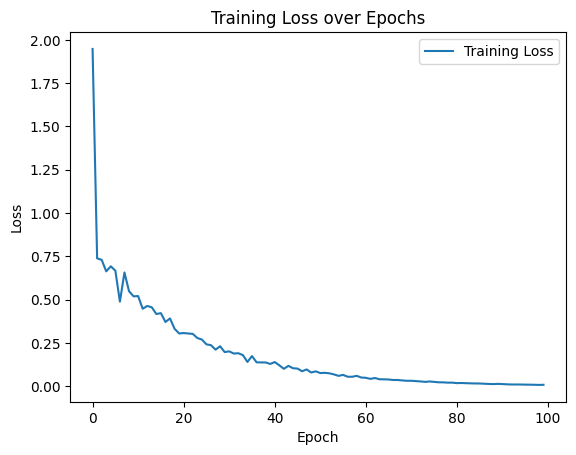

In [20]:
import matplotlib.pyplot as plt

# 손실값(loss) 시각화
plt.plot(hist.history['loss'], label='Training Loss')  # loss 값을 에포크별로 플롯
plt.xlabel('Epoch')  # x축 레이블: 에포크
plt.ylabel('Loss')   # y축 레이블: 손실값
plt.title('Training Loss over Epochs')  # 그래프 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력

In [21]:
result = model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))
result

1/1 [==============================] - 0s 223ms/step


array([[-1.4124138],
       [ 4.942976 ],
       [ 5.46391  ],
       [17.445383 ],
       [22.758907 ]], dtype=float32)

In [28]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [31]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 타겟데이터가 원핫인코딩 형식일 경우 -> sparse 없이 categorical_crossentropy로 loss function 설정
              metrics=['accuracy'])

In [39]:
hist = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2559 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1106 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0764 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0446 - accuracy: 0.9860


In [40]:
hist.history

{'loss': [0.25586509704589844,
  0.11060398072004318,
  0.07643391937017441,
  0.057951670140028,
  0.04455308988690376],
 'accuracy': [0.92576664686203,
  0.9677333235740662,
  0.977066695690155,
  0.982283353805542,
  0.9860166907310486]}

In [42]:
res = model.evaluate(x_test, y_test, verbose = 2)
res

313/313 - 2s - loss: 0.0811 - accuracy: 0.9764 - 2s/epoch - 7ms/step


[0.0810704454779625, 0.9764000177383423]

In [43]:
print("loss = ", res[0])
print("acc = ", res[1])

loss =  0.0810704454779625
acc =  0.9764000177383423


In [45]:
filename = "mnist_handwritingnumber.keras"
model.save(filename) # mnist.h5

In [46]:
load_model = tf.keras.models.load_model(filename)
load_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


array([[2.78621519e-06, 5.56684441e-08, 3.83179140e-04, ...,
        9.97032046e-01, 1.13768554e-04, 7.62279960e-05],
       [3.13147452e-10, 8.08463938e-07, 9.99998927e-01, ...,
        1.80797068e-13, 8.52282600e-09, 1.50833596e-13],
       [2.17033602e-07, 9.97695148e-01, 5.61880122e-04, ...,
        6.67884597e-04, 8.62461107e-04, 3.11027588e-06],
       ...,
       [1.77703807e-11, 9.61429936e-10, 3.17065929e-10, ...,
        6.56928592e-07, 2.90926937e-06, 1.54231297e-04],
       [5.91517221e-07, 8.20603052e-09, 2.90781332e-09, ...,
        4.21139617e-07, 1.12997157e-04, 2.01057548e-09],
       [3.36609020e-07, 2.83524071e-09, 1.13634587e-06, ...,
        1.15506541e-12, 2.62844928e-08, 1.98455758e-08]], dtype=float32)